# Fusion des Datasets

In [1]:
import pandas as pd
merged_df = pd.read_csv("data/processed/merged_data.csv")

In [2]:
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Crypto
0,"Dec 30, 2024","93,527.20","94,903.32","91,317.13","92,643.21","92,643.21","56,188,003,691",Bitcoin (BTC)
1,"Dec 29, 2024","95,174.05","95,174.88","92,881.79","93,530.23","93,530.23","29,635,885,267",Bitcoin (BTC)
2,"Dec 28, 2024","94,160.19","95,525.90","94,014.29","95,163.93","95,163.93","24,107,436,185",Bitcoin (BTC)
3,"Dec 27, 2024","95,704.98","97,294.84","93,310.74","94,164.86","94,164.86","52,419,934,565",Bitcoin (BTC)
4,"Dec 26, 2024","99,297.70","99,884.57","95,137.88","95,795.52","95,795.52","47,054,980,873",Bitcoin (BTC)


In [3]:
merged_df.dtypes

Date         object
Open         object
High         object
Low          object
Close        object
Adj Close    object
Volume       object
Crypto       object
dtype: object

In [4]:
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [ ]:

merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%b %d, %Y')

for col in numerical_columns:
    merged_df[col] = merged_df[col].str.replace(',', '').astype(float)

# Vérifier les résultats
print(merged_df.dtypes)
print(merged_df)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
Crypto               object
dtype: object
            Date        Open        High         Low       Close   Adj Close  \
0     2024-12-30  93527.2000  94903.3200  91317.1300  92643.2100  92643.2100   
1     2024-12-29  95174.0500  95174.8800  92881.7900  93530.2300  93530.2300   
2     2024-12-28  94160.1900  95525.9000  94014.2900  95163.9300  95163.9300   
3     2024-12-27  95704.9800  97294.8400  93310.7400  94164.8600  94164.8600   
4     2024-12-26  99297.7000  99884.5700  95137.8800  95795.5200  95795.5200   
...          ...         ...         ...         ...         ...         ...   
18265 2020-01-04      0.1935      0.1947      0.1918      0.1944      0.1944   
18266 2020-01-03      0.1879      0.1941      0.1858      0.1935      0.1935   
18267 2020-01-02      0.1927      0.1929  

In [6]:

nan_percentage = merged_df.isna().mean() * 100

for column, percentage in nan_percentage.items():
    print(f"Colonne: {column} | Pourcentage de NaN: {percentage:.2f}%")

Colonne: Date | Pourcentage de NaN: 0.00%
Colonne: Open | Pourcentage de NaN: 0.00%
Colonne: High | Pourcentage de NaN: 0.00%
Colonne: Low | Pourcentage de NaN: 0.00%
Colonne: Close | Pourcentage de NaN: 0.00%
Colonne: Adj Close | Pourcentage de NaN: 0.00%
Colonne: Volume | Pourcentage de NaN: 0.00%
Colonne: Crypto | Pourcentage de NaN: 0.00%


Pourcentage d'outliers pour Open : 19.92%
Pourcentage d'outliers pour High : 19.96%
Pourcentage d'outliers pour Low : 19.96%
Pourcentage d'outliers pour Close : 19.93%
Pourcentage d'outliers pour Adj Close : 19.93%
Pourcentage d'outliers pour Volume : 18.65%


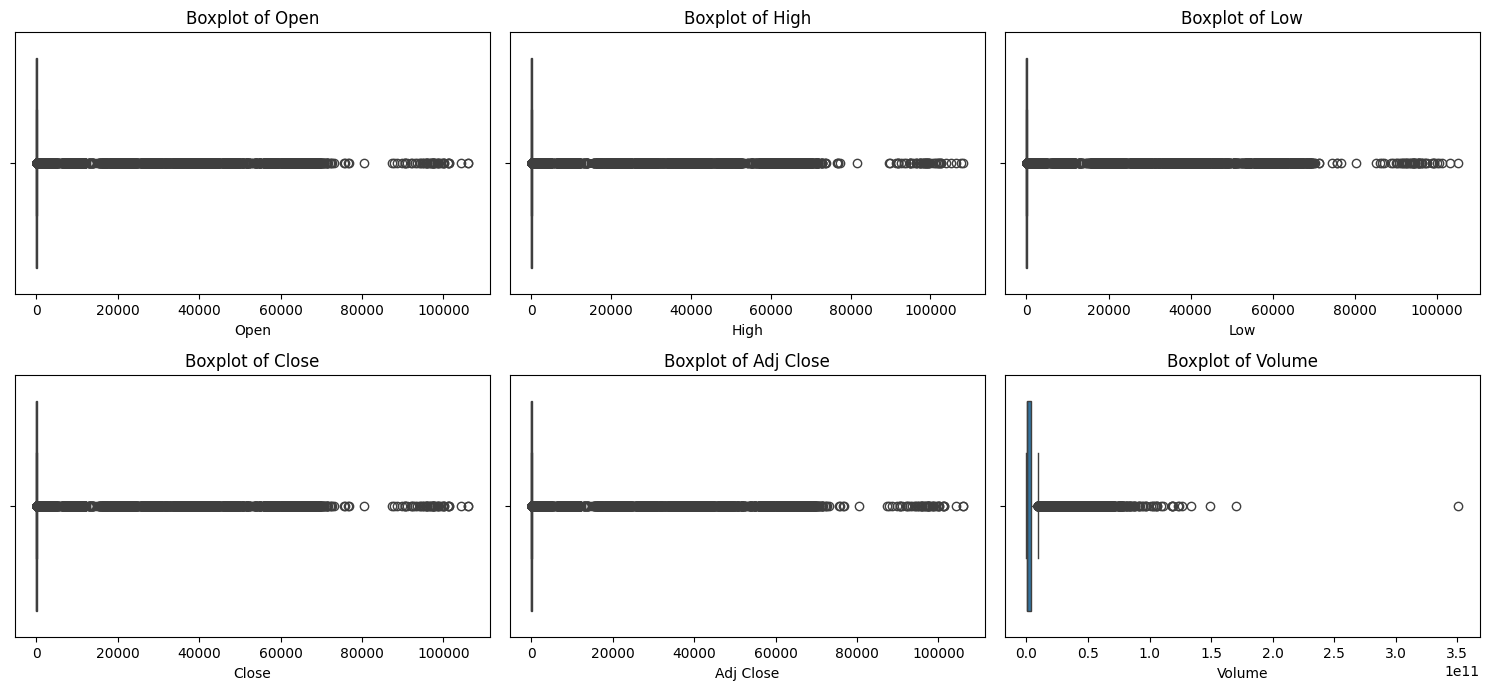

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def detect_outliers_and_percentage(df, columns):
    outliers_count = {}
    total_rows = len(df)
    
    for col in columns:
        # Calcul des quartiles et de l'IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

      
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

  
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = outliers.shape[0]

        outliers_percentage = (outliers.shape[0] / total_rows) * 100
        print(f"Pourcentage d'outliers pour {col} : {outliers_percentage:.2f}%")
    
    return outliers_count


outliers_count = detect_outliers_and_percentage(merged_df, numerical_columns)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(x=merged_df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


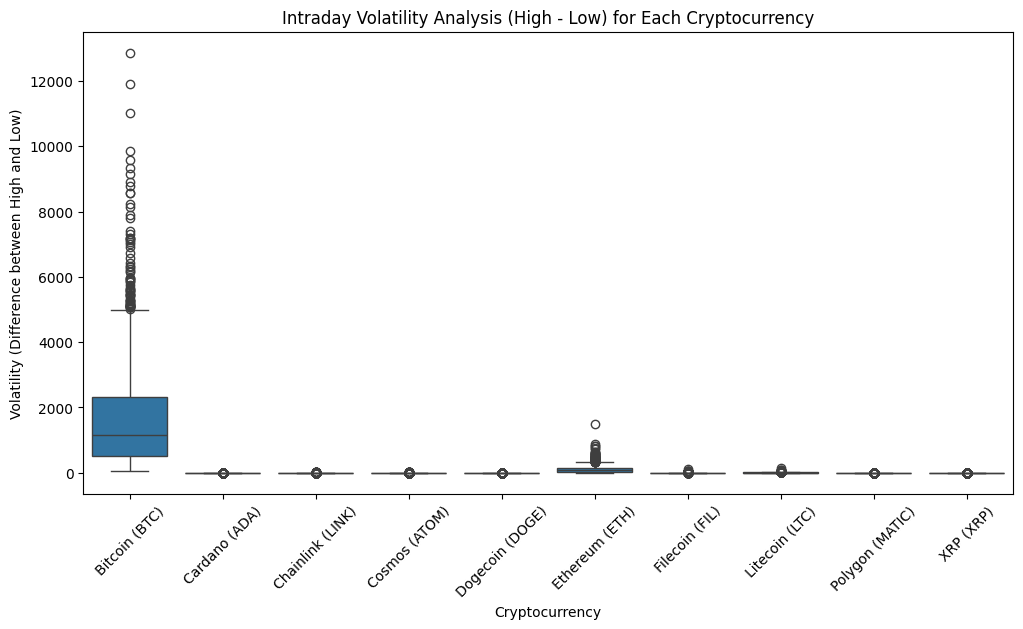

Volatility Statistics (High - Low) by Cryptocurrency:
                   count         mean          std        min         25%  \
Crypto                                                                      
Bitcoin (BTC)     1827.0  1623.888626  1531.298411  60.830000  501.245000   
Cardano (ADA)     1827.0     0.048421     0.072584   0.000613    0.009449   
Chainlink (LINK)  1827.0     1.165145     1.413754   0.060000    0.350000   
Cosmos (ATOM)     1827.0     1.066670     1.381262   0.040000    0.290450   
Dogecoin (DOGE)   1827.0     0.010403     0.022929   0.000024    0.001251   
Ethereum (ETH)    1827.0   110.461828   109.919873   2.310000   33.365000   
Filecoin (FIL)    1827.0     2.210342     5.188991   0.030000    0.263400   
Litecoin (LTC)    1827.0     6.793645     8.915406   0.480000    2.220000   
Polygon (MATIC)   1827.0     0.061257     0.091153   0.000326    0.011317   
XRP (XRP)         1827.0     0.043065     0.063883   0.002100    0.012100   

                     

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_df['Volatility'] = merged_df['High'] - merged_df['Low']


plt.figure(figsize=(12, 6))
sns.boxplot(x='Crypto', y='Volatility', data=merged_df)
plt.title('Intraday Volatility Analysis (High - Low) for Each Cryptocurrency')
plt.xlabel('Cryptocurrency')
plt.ylabel('Volatility (Difference between High and Low)')
plt.xticks(rotation=45)
plt.show()

volatility_stats_by_crypto = merged_df.groupby('Crypto')['Volatility'].describe()

print("Volatility Statistics (High - Low) by Cryptocurrency:")
print(volatility_stats_by_crypto)



In [11]:
merged_df.to_csv("data/processed/merged_data.csv", index=False)
